# LAB 6

##### Importing Libraries 

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")


In [243]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import BaggingClassifier


In [244]:

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  

import numpy as np
import pandas as pd

###### Data Preprocessing

In [230]:
from sklearn.datasets import fetch_kddcup99
D=fetch_kddcup99()

In [302]:
dir(D)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [301]:
print(D["DESCR"])

.. _kddcup99_dataset:

Kddcup 99 dataset
-----------------

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [2]_. The artificial data (described on the `dataset's
homepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was
generated using a closed network and hand-injected attacks to produce a
large number of different types of attack with normal activity in the
background. As the initial goal was to produce a large training set for
supervised learning algorithms, there is a large proportion (80.1%) of
abnormal data which is unrealistic in real world, and inappropriate for
unsupervised anomaly detection which aims at detecting 'abnormal' data, i.e.:

* qualitatively different from normal data
* in large minority among the observations.

We thus transform the KDD Data set into two different data sets: SA and SF.

* SA is obtained by simply selecting all

In [231]:
df = pd.DataFrame(data=D['data'],columns=D['feature_names'])

In [232]:
df['labels'] = D['target']

In [233]:
target_map = df.labels.unique().tolist()

In [234]:
df.labels = df.labels.apply(lambda x: target_map.index(x))

In [235]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [236]:
label_encoders = {}

for column in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [237]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [245]:
X, y = df.drop(columns=['labels']), df['labels']

In [246]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Exercise 1

1. Use the full [Kddcup](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) dataset to compare classification performance of 3 different classifiers. 
    * Separate the data into train, validation, and test. 
    * Use accuracy as the metric for assessing performance. 
    * For each classifier, identify the hyperparameters. Perform optimization over at least 2 hyperparameters.   
    * Compare the performance of the optimal configuration of the classifiers.

The three classifiers I will be using are
1. DecisionTree Classifier
2. Stochastic Gradient Descent Classifier
3. Multinomial Naive Bayes Classifier

In [262]:
# 1. Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Hyperparameters for grid search
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for hyperparameter optimization
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=3, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Validation accuracy
val_accuracy_dt = grid_search_dt.best_score_

print(f'\nDecision Tree Accuracy on Validation Set: {val_accuracy_dt:.5f}')
print(f'Decision Tree Best Hyperparameters: {best_params_dt}')


Decision Tree Accuracy on Validation Set: 0.99940
Decision Tree Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5}


In [248]:
# 2. SDG Classifier

sgd_classifier = SGDClassifier()

# hyperparameters for grid search
param_grid_sgd = {
    'alpha': [0.0001, 0.001],
    'max_iter': [1000, 2000],
}

# GridSearchCV for hyperparameter optimization
grid_search_sgd = GridSearchCV(sgd_classifier, param_grid_sgd, cv=3, scoring='accuracy')
grid_search_sgd.fit(X_train, y_train)

# best hyperparameters
best_params_sgd = grid_search_sgd.best_params_

# validation accuracy
val_accuracy_sgd = grid_search_sgd.best_score_

print(f'\nSGD Classifier Accuracy on Validation Set: {val_accuracy_sgd:.5f}')
print(f'SGD Best Hyperparameters: {best_params_sgd}')



SGD Classifier Accuracy on Validation Set: 0.82839
SGD Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 2000}


In [249]:
# 3. Multinomial Naive Bayes Classifier

nb_classifier = MultinomialNB()

# hyperparameters for grid search
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False],
}

# GridSearchCV for hyperparameter optimization
grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=3, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# best hyperparameters
best_params_nb = grid_search_nb.best_params_

# validation accuracy
val_accuracy_nb = grid_search_nb.best_score_

print(f'\nNaive Bayes Classifier Accuracy on Validation Set: {val_accuracy_nb:.5f}')
print(f'Naive Bayes Best Hyperparameters: {best_params_nb}')


Naive Bayes Classifier Accuracy on Validation Set: 0.83742
Naive Bayes Best Hyperparameters: {'alpha': 0.1, 'fit_prior': True}


The best performing classification alogorithm was the following

``best_classifier = DecisionTreeClassifier(DecisionTreeClassifier('max_depth'=None,  'min_samples_split'= 5)``

with an accuracy of ``0.99942``
  

## Exercise 2

2. Pick the best algorithm in question 1. Create an ensemble of at least 25 models, and use them for the classification task. Identify the top and bottom 10% of the data in terms of uncertainty of the decision.

In [250]:
best_classifier = DecisionTreeClassifier(max_depth=None, min_samples_split=5)

In [251]:
# ensemble of 25 Decision Trees
ensemble_size = 25
ensemble = BaggingClassifier(estimator=best_classifier, n_estimators=ensemble_size, random_state=42)

ensemble.fit(X_train, y_train)

# probabilities for each class for each sample
ensemble_probs = ensemble.predict_proba(X_test)

# accuracy of the ensemble model
ensemble_predictions = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

# Print the accuracy
print(f"Ensemble Accuracy: {ensemble_accuracy:.5f}")

Ensemble Accuracy: 0.99960


In [252]:
# small epsilon to avoid zero values
epsilon = 1e-15
ensemble_probs = np.clip(ensemble_probs, epsilon, 1 - epsilon)

# Recalculate uncertainty with the epsilon-clipped probabilities
uncertainty = -np.sum(ensemble_probs * np.log2(ensemble_probs), axis=1)

# Identify the indices of the top and bottom 10% of data
top_10_percent = np.argsort(uncertainty)[-int(0.1 * len(uncertainty)):]
bottom_10_percent = np.argsort(uncertainty)[:int(0.1 * len(uncertainty))]

# Now, you can use these indices to extract the corresponding samples from your dataset
top_10_percent_samples = X_test.iloc[top_10_percent]
bottom_10_percent_samples = X_test.iloc[bottom_10_percent]

# Example: Display the shape of the identified samples
print(f"Top 10% Samples Shape: {top_10_percent_samples.shape}")
print(f"Bottom 10% Samples Shape: {bottom_10_percent_samples.shape}")

Top 10% Samples Shape: (7410, 41)
Bottom 10% Samples Shape: (7410, 41)


## Exercise 3

3. Use 2 different feature selection algorithm to identify the 10 most important features for the task in question 1. Retrain classifiers in question 1 with just this subset of features and compare performance.

Using ``mutual information`` and `f_classif methods` for feature selection

In [253]:
# Identifying constant features and remove them
constant_features = X_train.columns[X_train.nunique() == 1]
X_train = X_train.drop(columns=constant_features)
X_test = X_test.drop(columns=constant_features)

In [254]:
# Feature selection using mutual information

selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
X_train_mi = selector_mi.fit_transform(X_train, y_train)
features_mi = np.argsort(selector_mi.scores_)[-10:]

In [255]:
# Feature selection using f_classif

selector_f = SelectKBest(score_func=f_classif, k='all')
X_train_f = selector_f.fit_transform(X_train, y_train)
features_f = np.argsort(selector_f.scores_)[-10:]

In [256]:
all_selected_features = np.concatenate([features_mi, features_f])

# unique features
unique_features = np.unique(all_selected_features)

# top 10 features among the unique features
final_selected_features = unique_features[:10]

print("Final Top 10 Features:", final_selected_features)

Final Top 10 Features: [ 1  2  4  6  7 20 21 26 30 31]


In [257]:
# Extracting the top ten features from your training and test sets
X_train_top10 = X_train.iloc[:,final_selected_features]
X_test_top10 = X_test.iloc[:,final_selected_features]

Retraining all the three classifiers with only Top 10 Features

In [263]:
# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Hyperparameters for grid search
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for hyperparameter optimization
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=3, scoring='accuracy')
grid_search_dt.fit(X_train_top10, y_train)

# Best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Validation accuracy
val_accuracy_dt = grid_search_dt.best_score_

print(f'\nDecision Tree Accuracy on Validation Set: {val_accuracy_dt:.5f}')
print(f'Decision Tree Best Hyperparameters: {best_params_dt}')


Decision Tree Accuracy on Validation Set: 0.99853
Decision Tree Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10}


In [259]:
# SGD Classifier
sgd_classifier = SGDClassifier()

# Hyperparameters for grid search
param_grid_sgd = {
    'alpha': [0.0001, 0.001],
    'max_iter': [1000, 2000],
}

# GridSearchCV for hyperparameter optimization
grid_search_sgd = GridSearchCV(sgd_classifier, param_grid_sgd, cv=3, scoring='accuracy')
grid_search_sgd.fit(X_train_top10, y_train)

# Best hyperparameters
best_params_sgd = grid_search_sgd.best_params_

# Validation accuracy
val_accuracy_sgd = grid_search_sgd.best_score_

print(f'\nSGD Classifier Accuracy on Validation Set: {val_accuracy_sgd:.5f}')
print(f'SGD Best Hyperparameters: {best_params_sgd}')



SGD Classifier Accuracy on Validation Set: 0.87707
SGD Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 1000}


In [260]:
# Multinomial Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Hyperparameters for grid search
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False],
}

# GridSearchCV for hyperparameter optimization
grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=3, scoring='accuracy')
grid_search_nb.fit(X_train_top10, y_train)

# Best hyperparameters
best_params_nb = grid_search_nb.best_params_

# Validation accuracy
val_accuracy_nb = grid_search_nb.best_score_

print(f'\nNaive Bayes Classifier Accuracy on Validation Set: {val_accuracy_nb:.5f}')
print(f'Naive Bayes Best Hyperparameters: {best_params_nb}')


Naive Bayes Classifier Accuracy on Validation Set: 0.82149
Naive Bayes Best Hyperparameters: {'alpha': 1.0, 'fit_prior': True}


**Classifiers when trained with only TOP 10 features performed better**

**Comparison of Accuracy scores**

`DecisionTreeClassifier`
Accuracy score before `0.99942`
with only 10 features the accuracy score is `0.99852`

`SGDClassifier`
Accuracy score before `0.82839`
with only 10 features the accuracy score is `0.87707`

`MultinomialNBClassifier`
Accuracy score before `0.82149`
with only 10 features the accuracy score is ``

## Exercise 4

4. Use the same data, removing the labels, and compare performance of 3 different clustering algorithms. Can you find clusters for each of the classes in question 1? 

The three Clustering Algorithms that I will be using are

1. KMeans Clustering
2. MiniBatchKMeans Clustering
3. Birch Clustering

In [264]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [265]:
# KMeans model
kmeans = KMeans(n_clusters=23, random_state=42, n_init = 'auto')
cluster = kmeans.fit_predict(X_scaled)

In [266]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_scaled)

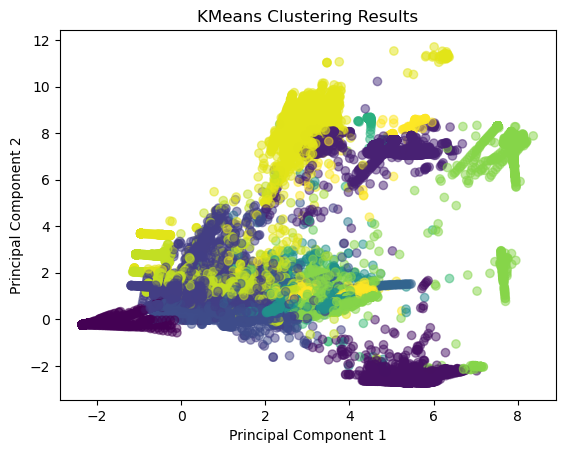

In [275]:
# scatter plot of the reduced features with color-coded clusters

scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster, cmap='viridis', alpha=0.5)

plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [268]:
pca2 = PCA(n_components=3)
reduced_features2 = pca2.fit_transform(X_scaled)

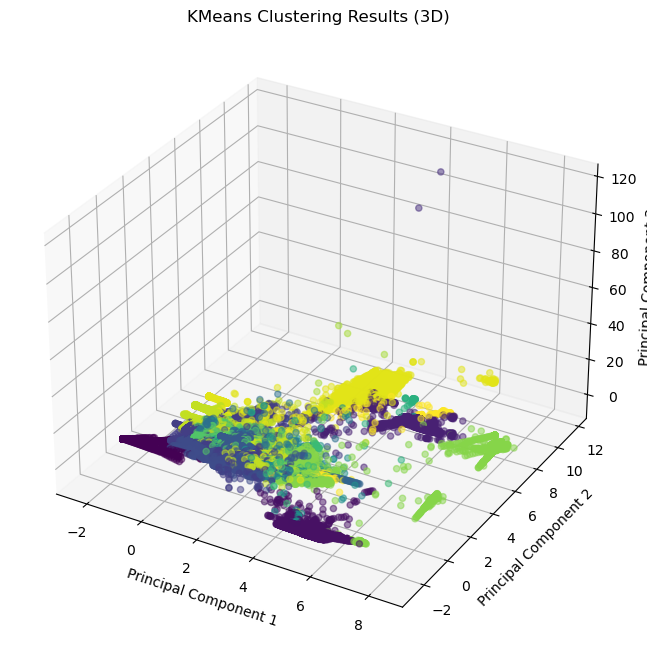

In [269]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features2[:, 0], reduced_features2[:, 1], reduced_features2[:, 2], c=cluster, cmap='viridis', alpha=0.5)

ax.set_title('KMeans Clustering Results (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

In [270]:
# MiniBatchKMeans Clustering

n_clusters_mini_batch = 23

mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters_mini_batch, random_state=42, n_init = 'auto')
clusters_mini_batch = mini_batch_kmeans.fit_predict(X_scaled)

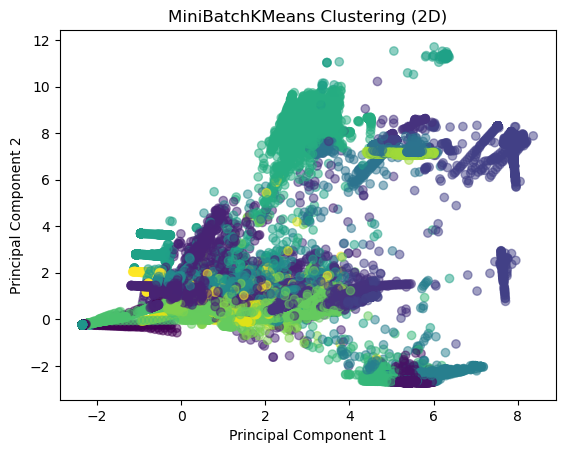

In [276]:
# scatter plot for MiniBatchKMeans

scatter_mini_batch = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters_mini_batch, cmap='viridis', alpha=0.5)

plt.title('MiniBatchKMeans Clustering (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [277]:
# Birch Clustering

n_clusters_birch = 23

birch = Birch(n_clusters=n_clusters_birch)
clusters_birch = birch.fit_predict(X_scaled)

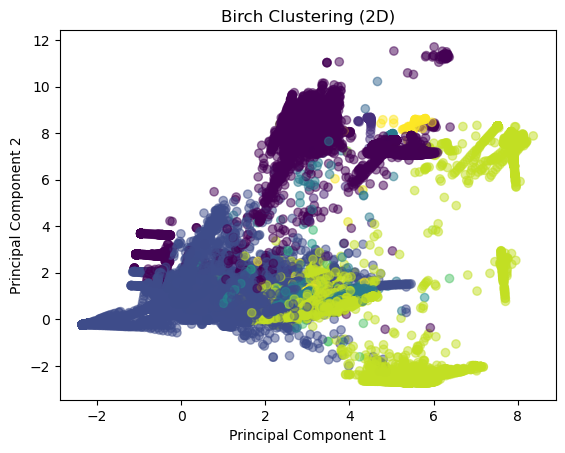

In [278]:
# scatter plot for Birch

scatter_birch = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters_birch, cmap='viridis', alpha=0.5)

plt.title('Birch Clustering (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Not all the classes were distinctively identified in the clusters

## Exercise 5

5. Can you identify any clusters within the top/botton 10% identified in 2. What are their characteristics?

In [287]:
# Apply KMeans clustering
kmeans_top_10 = KMeans(n_clusters=23, random_state=42, n_init = 'auto')
top_10_clusters = kmeans_top_10.fit_predict(top_10_percent_samples)


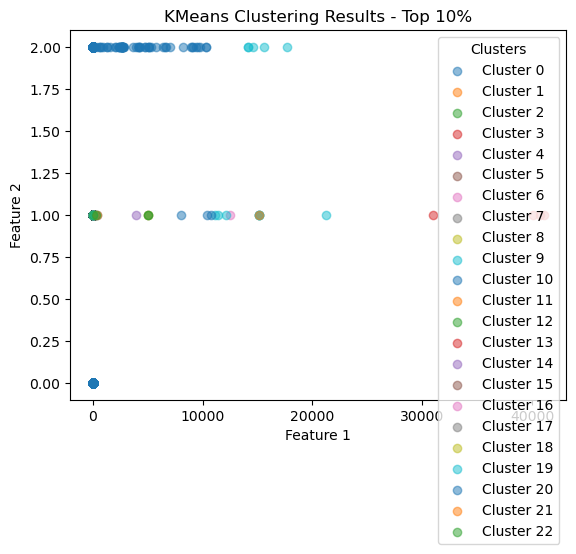

In [288]:
# Plot each cluster separately and add legend
for cluster_id in range(23):
    cluster_samples = top_10_percent_samples[top_10_clusters == cluster_id]
    plt.scatter(cluster_samples.iloc[:, 0], cluster_samples.iloc[:, 1], label=f'Cluster {cluster_id}', alpha=0.5)

# Add legend
plt.legend(title='Clusters')
plt.title('KMeans Clustering Results - Top 10%')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [289]:
# Apply KMeans clustering
kmeans_bottom_10 = KMeans(n_clusters=23, random_state=42, n_init = 'auto')
bottom_10_clusters = kmeans_bottom_10.fit_predict(bottom_10_percent_samples)

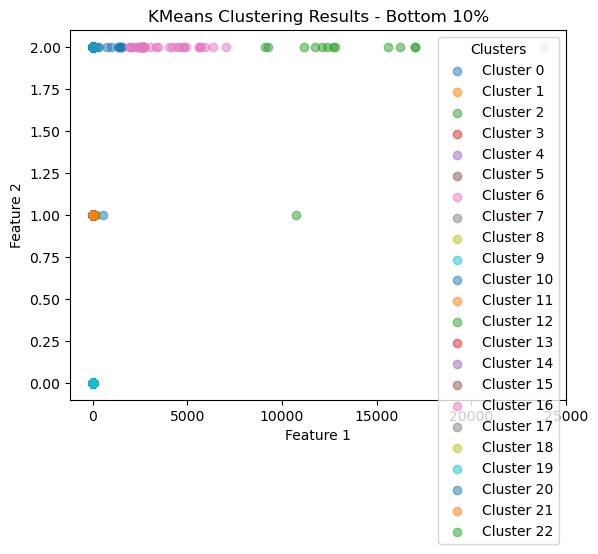

In [290]:
# Plot each cluster separately and add legend
for cluster_id in range(23):
    cluster_samples = bottom_10_percent_samples[bottom_10_clusters == cluster_id]
    plt.scatter(cluster_samples.iloc[:, 0], cluster_samples.iloc[:, 1], label=f'Cluster {cluster_id}', alpha=0.5)

# Add legend
plt.legend(title='Clusters')
plt.title('KMeans Clustering Results - Bottom 10%')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In the Clustering of the top 10% of the dataset, more clusters can be distinctively identified but not in the clustering of the bottom 10% of the dataset

## Exercise 6

6. Use the "SA" dataset to compare the performance of 3 different anomaly detection algorithms.

In [291]:
sa_dataset = fetch_kddcup99(subset='SA', as_frame=True)
sa_df = sa_dataset.frame

In [292]:
sa_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [293]:
target_map2 = sa_df.labels.unique().tolist()

In [294]:
sa_df.labels = sa_df.labels.apply(lambda x: target_map2.index(x))

In [295]:
label_encoders = {}

for column in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    sa_df[column] = le.fit_transform(sa_df[column])
    label_encoders[column] = le

In [296]:
sa_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,18,8,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,18,8,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,18,8,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,18,8,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,18,8,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [297]:
X_sa, y_sa = sa_df.drop(columns=['labels']), sa_df['labels']

In [298]:
X_sa_train, X_sa_test, y_sa_train, y_sa_test = train_test_split(X_sa, y_sa, test_size=0.2, random_state=42)


The following three Anomaly Detections are implemented:
1. Isolation Forest
2. OneClassSVM
3. Gaussian Mixture Model

In [181]:
# Fit Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_sa_train)

IsolationForest(contamination=0.1, random_state=42)

In [198]:
# Predict on the test set
y_pred = isolation_forest.predict(X_sa_test)

# Convert predictions to 0 (normal) and 1 (anomaly)
y_pred[y_pred == 1] = 0  # 1 represents normal observations, so convert it to 0
y_pred[y_pred == -1] = 1  # -1 represents anomalies, so convert it to 1


In [199]:
precision = precision_score(y_sa_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_sa_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_sa_test, y_pred, average='weighted', zero_division=1)

# Print
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))

Precision: 0.96125
Recall: 0.89951
F1-score: 0.92340


In [184]:
# Print classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_sa_test, y_pred))


Confusion Matrix:
[[17951  1530     0     0     0     0     0     0]
 [  319   157     0     0     0     0     0     0]
 [    3     3     0     0     0     0     0     0]
 [    0   159     0     0     0     0     0     0]
 [    0     4     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]]


In [185]:
X_sa_test_pca = pca.fit_transform(X_sa_test)

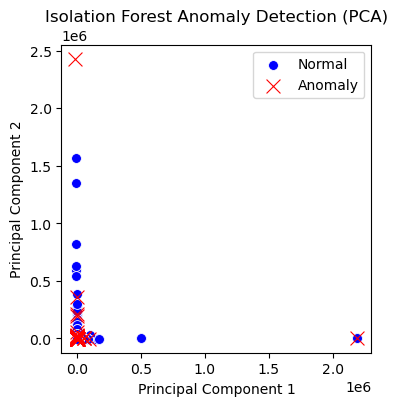

In [186]:
# Identify anomalies for separate plotting
anomalies = X_sa_test_pca[y_pred == 1]

# Visualize the fit on a 2D plot
plt.figure(figsize=(4, 4))

# Plot normal points
sns.scatterplot(x=X_sa_test_pca[y_pred == 0, 0], y=X_sa_test_pca[y_pred == 0, 1], color='blue', label='Normal', s=50)

# Plot anomalies with a different marker
sns.scatterplot(x=anomalies[:, 0], y=anomalies[:, 1], color='red', marker='x', label='Anomaly', s=100)

plt.title('Isolation Forest Anomaly Detection (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [187]:
# Initialize the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.01)  # Adjust nu based on your dataset

# Fit the model on the training data (consider only normal instances for training)
one_class_svm.fit(X_sa_train[y_sa_train == 0])


OneClassSVM(nu=0.01)

In [188]:
# Predict on the test set
y_pred_svm = one_class_svm.predict(X_sa_test)

# Convert predictions to 0 (normal) and 1 (anomaly)
y_pred_svm[y_pred_svm == 1] = 0  # 1 represents normal observations, so convert it to 0
y_pred_svm[y_pred_svm == -1] = 1  # -1 represents anomalies, so convert it to 1


In [190]:
precision = precision_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)
recall = recall_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)
f1 = f1_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)

# Print
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))


Precision: 0.95157
Recall: 0.94486
F1-score: 0.96754


In [191]:
# Print classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_sa_test, y_pred_svm))


Confusion Matrix:
[[19021   460     0     0     0     0     0     0]
 [  476     0     0     0     0     0     0     0]
 [    0     6     0     0     0     0     0     0]
 [   18   141     0     0     0     0     0     0]
 [    1     3     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]]


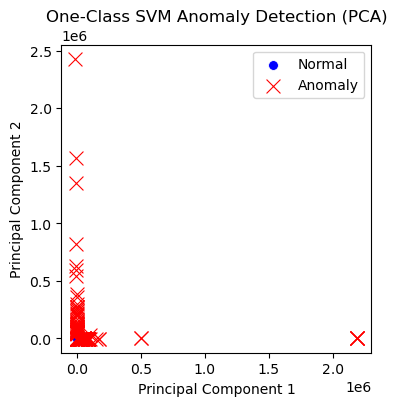

In [192]:
# Apply PCA to reduce dimensionality to 2 components
X_sa_test_pca_svm = pca.transform(X_sa_test)

# Identify anomalies for separate plotting
anomalies_svm = X_sa_test_pca_svm[y_pred_svm == 1]

# Visualize the fit on a 2D plot
plt.figure(figsize=(4,4))

# Plot normal points
sns.scatterplot(x=X_sa_test_pca_svm[y_pred_svm == 0, 0], y=X_sa_test_pca_svm[y_pred_svm == 0, 1], color='blue', label='Normal', s=50)

# Plot anomalies with a different marker
sns.scatterplot(x=anomalies_svm[:, 0], y=anomalies_svm[:, 1], color='red', marker='x', label='Anomaly', s=100)

plt.title('One-Class SVM Anomaly Detection (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [193]:
# Initialize the GMM model
gmm = GaussianMixture(n_components=2, covariance_type='full')  # Assuming 2 components (normal and anomaly)

# Fit the model on the training data (consider only normal instances for training)
gmm.fit(X_sa_train[y_sa_train == 0])


GaussianMixture(n_components=2)

In [194]:
# Compute the Mahalanobis distance for each sample
mahalanobis_distance = gmm.score_samples(X_sa_test)

# Set a threshold to classify anomalies
threshold = mahalanobis_distance.mean() - 3 * mahalanobis_distance.std()

# Predict anomalies based on the threshold
y_pred_gmm = (mahalanobis_distance < threshold).astype(int)


In [195]:
precision = precision_score(y_sa_test, y_pred_gmm, average='weighted', zero_division=1)
recall = recall_score(y_sa_test, y_pred_gmm, average='weighted', zero_division=1)
f1 = f1_score(y_sa_test, y_pred_gmm, average='weighted', zero_division=1)

# Print
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))


Precision: 0.95149
Recall: 0.96622
F1-score: 0.97804


In [196]:
# Print classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_sa_test, y_pred_gmm))


Confusion Matrix:
[[19451    30     0     0     0     0     0     0]
 [  476     0     0     0     0     0     0     0]
 [    6     0     0     0     0     0     0     0]
 [   25   134     0     0     0     0     0     0]
 [    1     3     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]]


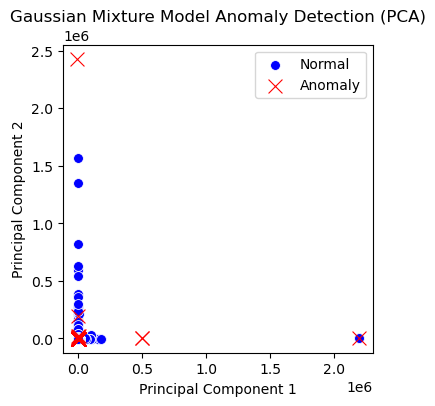

In [200]:
# Apply PCA to reduce dimensionality to 2 components
X_sa_test_pca_gmm = pca.transform(X_sa_test)

# Identify anomalies for separate plotting
anomalies_gmm = X_sa_test_pca_gmm[y_pred_gmm == 1]

# Visualize the fit on a 2D plot
plt.figure(figsize=(4,4))

# Plot normal points
sns.scatterplot(x=X_sa_test_pca_gmm[y_pred_gmm == 0, 0], y=X_sa_test_pca_gmm[y_pred_gmm == 0, 1], color='blue', label='Normal', s=50)

# Plot anomalies with a different marker
sns.scatterplot(x=anomalies_gmm[:, 0], y=anomalies_gmm[:, 1], color='red', marker='x', label='Anomaly', s=100)

plt.title('Gaussian Mixture Model Anomaly Detection (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Exercise 7 

7. Create a subsample of 250 datapoints, redo question 6, using Leave-one-out as the method of evaluation.

In [201]:
# random subsample of 250 datapoints
subsample_size = 250
sa_df_subsample = sa_df.sample(n=subsample_size, random_state=42)

# Extract features and labels
X_subsample, y_subsample = sa_df_subsample.drop(columns=['labels']), sa_df_subsample['labels']


Implementing Leave-One-Out Cross-Validation for Isolation Forest

In [179]:
# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01, random_state=42) 

# Lists to store true labels and predicted labels
true_labels_iforest = []
pred_labels_iforest = []

# Leave-One-Out cross-validation
loo = LeaveOneOut()
for train_index, test_index in loo.split(X_subsample):
    X_train, X_test = X_subsample.iloc[train_index], X_subsample.iloc[test_index]
    y_train, y_test = y_subsample.iloc[train_index], y_subsample.iloc[test_index]

    # Fit the model on the training data
    isolation_forest.fit(X_train)

    # Predict on the test instance
    y_pred = isolation_forest.predict(X_test)

    # Convert predictions to 0 (normal) and 1 (anomaly)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # Avoid FutureWarning by using int(ser.iloc[0])
    true_labels_iforest.append(int(y_test.iloc[0]))
    pred_labels_iforest.append(int(y_pred[0]))

# Compute precision, recall, and F1-score
precision_iforest = precision_score(true_labels_iforest, pred_labels_iforest, average='weighted', zero_division=1)
recall_iforest = recall_score(true_labels_iforest, pred_labels_iforest, average='weighted', zero_division=1)
f1_iforest = f1_score(true_labels_iforest, pred_labels_iforest, average='weighted', zero_division=1)

# Print the metrics 
print("Isolation Forest Metrics:")
print("Precision: {:.5f}".format(precision_iforest))
print("Recall: {:.5f}".format(recall_iforest))
print("F1-score: {:.5f}".format(f1_iforest))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels_iforest, pred_labels_iforest))

Isolation Forest Metrics:
Precision: 0.94457
Recall: 0.96000
F1-score: 0.97818

Confusion Matrix:
[[240   2   0]
 [  7   0   0]
 [  0   1   0]]


In [180]:
# Initialize the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.01)  

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X_subsample):
    X_train, X_test = X_subsample.iloc[train_index], X_subsample.iloc[test_index]
    y_train, y_test = y_subsample.iloc[train_index], y_subsample.iloc[test_index]

    # Fit the model on the training data (consider only normal instances for training)
    one_class_svm.fit(X_train[y_train == 0])

    # Predict on the test set
    y_pred = one_class_svm.predict(X_test)

    # Convert predictions to 0 (normal) and 1 (anomaly)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # Store true and predicted labels
    true_labels.append(int(y_test.iloc[0]))
    predicted_labels.append(int(y_pred[0]))

# Print classification report and confusion matrix

# Compute precision, recall, and F1-score
precision_svm = precision_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)
recall_svm = recall_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)
f1_svm = f1_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)

# Print the metrics
print("One-Class SVM Metrics:")
print("Precision: {:.5f}".format(precision_svm))
print("Recall: {:.5f}".format(recall_svm))
print("F1-score: {:.5f}".format(f1_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))


One-Class SVM Metrics:
Precision: 0.95157
Recall: 0.94486
F1-score: 0.96754

Confusion Matrix:
[[224  18   0]
 [  7   0   0]
 [  0   1   0]]


In [299]:
# Initialize the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)  

# Lists to store true labels and predicted labels
true_labels_gmm = []
pred_labels_gmm = []

# Leave-One-Out cross-validation
loo = LeaveOneOut()
for train_index, test_index in loo.split(X_subsample):
    X_train, X_test = X_subsample.iloc[train_index], X_subsample.iloc[test_index]
    y_train, y_test = y_subsample.iloc[train_index], y_subsample.iloc[test_index]

    # Fit the model on the training data
    gmm.fit(X_train)

    # Predict on the test instance
    y_scores = gmm.score_samples(X_test)
    threshold = y_scores.mean() - 3 * y_scores.std() 

    # Convert scores to binary labels
    y_pred = (y_scores < threshold).astype(int)

    # Avoid FutureWarning by using int(ser.iloc[0])
    true_labels_gmm.append(int(y_test.iloc[0]))
    pred_labels_gmm.append(int(y_pred[0]))

# Compute precision, recall, and F1-score
precision_gmm = precision_score(true_labels_gmm, pred_labels_gmm, average='weighted', zero_division=1)
recall_gmm = recall_score(true_labels_gmm, pred_labels_gmm, average='weighted', zero_division=1)
f1_gmm = f1_score(true_labels_gmm, pred_labels_gmm, average='weighted', zero_division=1)

# Print the metrics 
print("Gaussian Mixture Model Metrics:")
print("Precision: {:.5f}".format(precision_gmm))
print("Recall: {:.5f}".format(recall_gmm))
print("F1-score: {:.5f}".format(f1_gmm))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels_gmm, pred_labels_gmm))

Gaussian Mixture Model Metrics:
Precision: 0.96902
Recall: 0.96800
F1-score: 0.95226

Confusion Matrix:
[[242   0   0]
 [  7   0   0]
 [  1   0   0]]


## Exercise 8

8. Use the feature selection algorithm to identify the 5 most important features for the task in question 6, for each algorithm. Does the anomaly detection improve using less features?

In [202]:
k = 5  

# SelectKBest object with mutual information criterion
selector = SelectKBest(score_func=mutual_info_classif, k=k)

# Fit the selector to the data
X_selected = selector.fit_transform(X_sa, y_sa)

# indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

print("Selected Feature Indices:", selected_feature_indices)


Selected Feature Indices: [ 1  2  4 22 23]


In [203]:
X_sa_test_selected = X_sa_test.iloc[:, selected_feature_indices]


In [204]:
X_sa_train_selected = X_sa_train.iloc[:, selected_feature_indices]


Retraining all three ALgorithms with selected features

In [205]:
# Fit Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_sa_train_selected)

IsolationForest(contamination=0.1, random_state=42)

In [206]:
# Predict on the test set
y_pred = isolation_forest.predict(X_sa_test_selected)

# Convert predictions to 0 (normal) and 1 (anomaly)
y_pred[y_pred == 1] = 0  # 1 represents normal observations, so convert it to 0
y_pred[y_pred == -1] = 1  # -1 represents anomalies, so convert it to 1


In [207]:
precision = precision_score(y_sa_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_sa_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_sa_test, y_pred, average='weighted', zero_division=1)

# Print
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))


Precision: 0.98167
Recall: 0.92415
F1-score: 0.94185


In [208]:
# Print classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_sa_test, y_pred))


Confusion Matrix:
[[18128  1353     0     0     0     0     0     0]
 [    0   476     0     0     0     0     0     0]
 [    0     6     0     0     0     0     0     0]
 [    1   158     0     0     0     0     0     0]
 [    0     4     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]]


In [217]:
# Initialize the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.01)  # Adjust nu based on your dataset

# Fit the model on the training data (consider only normal instances for training)
one_class_svm.fit(X_sa_train_selected[y_sa_train == 0])

OneClassSVM(nu=0.01)

In [218]:
# Predict on the test set
y_pred_svm = one_class_svm.predict(X_sa_test_selected)

# Convert predictions to 0 (normal) and 1 (anomaly)
y_pred_svm[y_pred_svm == 1] = 0  # 1 represents normal observations, so convert it to 0
y_pred_svm[y_pred_svm == -1] = 1  # -1 represents anomalies, so convert it to 1

In [219]:
precision = precision_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)
recall = recall_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)
f1 = f1_score(y_sa_test, y_pred_svm, average='weighted', zero_division=1)

# Print
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))


Precision: 0.95198
Recall: 0.91893
F1-score: 0.95462


In [220]:
# Print classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_sa_test, y_pred_svm))

Confusion Matrix:
[[18499   982     0     0     0     0     0     0]
 [  476     0     0     0     0     0     0     0]
 [    0     6     0     0     0     0     0     0]
 [    0   159     0     0     0     0     0     0]
 [    1     3     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0]]


In [221]:
# Initialize the GMM model
gmm = GaussianMixture(n_components=2, covariance_type='full')  # Assuming 2 components (normal and anomaly)

# Fit the model on the training data (consider only normal instances for training)
gmm.fit(X_sa_train_selected[y_sa_train == 0])


GaussianMixture(n_components=2)

In [222]:
# Compute the Mahalanobis distance for each sample in the test set
mahalanobis_distance = gmm.score_samples(X_sa_test_selected)

# Set a threshold to classify anomalies
threshold = mahalanobis_distance.mean() - 3 * mahalanobis_distance.std()

# Predict anomalies based on the threshold
y_pred_gmm = (mahalanobis_distance < threshold).astype(int)

In [223]:
precision = precision_score(y_sa_test, y_pred_gmm, average='weighted', zero_division=1)
recall = recall_score(y_sa_test, y_pred_gmm, average='weighted', zero_division=1)
f1 = f1_score(y_sa_test, y_pred_gmm, average='weighted', zero_division=1)

# Print
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))


Precision: 0.99180
Recall: 0.99091
F1-score: 0.98683


All the three algorithms with selected features performed better than before

***BEFORE with all features***                           

**Isolation Forest**
<br>Precision: 0.96125
<br>Recall: 0.89951
<br>F1-score: 0.92340

**OneClassSVM**
<br>Precision: 0.95157
<br>Recall: 0.94486
<br>F1-score: 0.96754

**GaussinMixture**
<br>Precision: 0.95149
<br>Recall: 0.96622
<br>F1-score: 0.97804


***AFTER with selected features***

**Isolation Forest**
<br>Precision: 0.98167
<br>Recall: 0.92415
<br>F1-score: 0.94185

**OneClassSVM**
<br>Precision: 0.95198
<br>Recall: 0.91893
<br>F1-score: 0.95462

**GaussinMixture**
<br>Precision: 0.99180
<br>Recall: 0.99091
<br>F1-score: 0.98683
